In [78]:
import pandas as pd
import numpy as np
import datetime
import datetime as dt
import pytz
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import statsmodels.api as sm  
import matplotlib.pyplot as plt  
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [79]:
import os
working_directory = os.getcwd()
print(working_directory)

/Users/louisaliparisa/Desktop


In [80]:
def dateparse(time_in_secs):
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))


path = working_directory + '/data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'
bitcoin1 = pd.read_csv(path, parse_dates=[0], date_parser=dateparse)

In [81]:
bitcoin1.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 02:52:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 02:53:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 02:54:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 02:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 02:56:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
bitcoin1

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 02:52:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 02:53:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 02:54:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 02:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 02:56:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 19:56:00+00:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 19:57:00+00:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 19:58:00+00:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 19:59:00+00:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [83]:
bitcoin = bitcoin1.dropna().reset_index(drop=True)
bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 02:52:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 10:50:00+00:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,2011-12-31 11:59:00+00:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,2011-12-31 12:00:00+00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,2011-12-31 23:16:00+00:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
3613764,2021-03-30 19:56:00+00:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
3613765,2021-03-30 19:57:00+00:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
3613766,2021-03-30 19:58:00+00:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
3613767,2021-03-30 19:59:00+00:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [84]:
bitcoin['Timestamp'] = bitcoin['Timestamp'].dt.tz_localize(None)
bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 02:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 10:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,2011-12-31 11:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,2011-12-31 12:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,2011-12-31 23:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
3613764,2021-03-30 19:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
3613765,2021-03-30 19:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
3613766,2021-03-30 19:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
3613767,2021-03-30 19:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [85]:
bitcoin = bitcoin.groupby([pd.Grouper(key='Timestamp', freq='D')]).first().reset_index()
bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2012-01-01,4.84,4.84,4.84,4.84,10.000000,48.400000,4.840000
2,2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000
3,2012-01-03,5.32,5.32,5.32,5.32,2.419173,12.870000,5.320000
4,2012-01-04,4.93,4.93,4.93,4.93,9.680000,47.722400,4.930000
...,...,...,...,...,...,...,...,...
3373,2021-03-26,52449.23,52537.81,52449.23,52527.35,2.742287,143985.370640,52505.587896
3374,2021-03-27,54821.66,54856.01,54821.66,54856.01,0.261643,14346.416748,54832.004555
3375,2021-03-28,56095.81,56158.59,56095.81,56149.01,0.898928,50459.981106,56133.517533
3376,2021-03-29,55361.25,55417.15,55361.25,55401.67,1.314104,72804.822995,55402.653850


In [87]:
bitcoin = bitcoin.set_index('Timestamp')

KeyError: "None of ['Timestamp'] are in the columns"

In [89]:
bitcoinx = bitcoin[['Close']]
bitcoinx

,Close
Timestamp,
2011-12-31,4.39
2012-01-01,4.84
2012-01-02,5.00
2012-01-03,5.32
2012-01-04,4.93
...,...
2021-03-26,52527.35
2021-03-27,54856.01
2021-03-28,56149.01


In [90]:
bitcoinx['Close'] = bitcoinx['Close'].fillna(method='ffill')

<ipython-input-90-8db6d492bfdd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
bitcoinx.index = pd.to_datetime(bitcoinx.index)

In [92]:
#print(bitcoin.head(20))


splitdate = '2018-12-17'
predate = '2020-04-01'
bitcoin_train = bitcoinx.loc[bitcoinx.index > splitdate]
bitcoin_train = bitcoin_train.loc[bitcoin_train.index <= predate]
bitcoin_test = bitcoinx.loc[bitcoinx.index > predate]
#bitcoin_test = bitcoin_test.loc[bitcoin_test.index < '2020-04-25']

In [93]:
bitcoin_train = bitcoin_train.reset_index()
bitcoin_trainx = bitcoin_train[['Timestamp']]
bitcoin_trainx['Timestamp'] = pd.to_datetime(bitcoin_trainx['Timestamp'])
bitcoin_trainx['Timestamp']=bitcoin_trainx['Timestamp'].map(dt.datetime.toordinal)
bitcoin_trainx

<ipython-input-93-44349ceef573>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-93-44349ceef573>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Timestamp
0,737046
1,737047
2,737048
3,737049
4,737050
...,...
466,737512
467,737513
468,737514
469,737515


In [94]:
bitcoin_trainy = bitcoin_train[['Close']]
bitcoin_trainy

,Close
0,3517.74
1,3715.25
2,3736.95
3,4017.46
4,3807.18
...,...
466,6109.16
467,6209.34
468,6017.46
469,6435.00


In [95]:
bitcoin_test= bitcoin_test.reset_index()

bitcoin_test

,Timestamp,Close
0,2020-04-02,6626.56
1,2020-04-03,6783.30
2,2020-04-04,6697.55
3,2020-04-05,6785.86
4,2020-04-06,6864.44
...,...,...
358,2021-03-26,52527.35
359,2021-03-27,54856.01
360,2021-03-28,56149.01
361,2021-03-29,55401.67


In [96]:
bitcoin_testx = bitcoin_test[['Timestamp']]
bitcoin_testx['Timestamp'] = pd.to_datetime(bitcoin_testx['Timestamp'])
bitcoin_testx['Timestamp']=bitcoin_testx['Timestamp'].map(dt.datetime.toordinal)
bitcoin_testx

<ipython-input-96-f3d0816fa189>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-96-f3d0816fa189>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Timestamp
0,737517
1,737518
2,737519
3,737520
4,737521
...,...
358,737875
359,737876
360,737877
361,737878


In [97]:
bitcoin_testy = bitcoin_test[['Close']]
bitcoin_testy

,Close
0,6626.56
1,6783.30
2,6697.55
3,6785.86
4,6864.44
...,...
358,52527.35
359,54856.01
360,56149.01
361,55401.67


In [98]:
bitcoin.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')

In [99]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=bitcoin.index, y=bitcoin['Open'],
                    mode='lines',
                    name='Open'))
fig.show()

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=bitcoin.index, y= bitcoin['Volume_(BTC)'],
                    mode='lines',
                    name='Volume_(BTC)'))
fig.add_trace(go.Scatter(x=bitcoin.index, y= bitcoin['Volume_(Currency)'],
                    mode='lines',
                    name='Volume_(Currency)'))

fig.show()

# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg = LinearRegression()

In [24]:
reg = reg.fit(bitcoin_trainx,bitcoin_trainy)

In [25]:
bitcoin_predy = reg.predict(bitcoin_testx)

In [26]:
bitcoin_predy.squeeze().tolist()

[9957.681367033161,
 9968.416508940049,
 9979.151650847867,
 9989.886792755686,
 10000.621934662573,
 10011.357076570392,
 10022.09221847821,
 10032.827360385098,
 10043.562502292916,
 10054.297644200735,
 10065.032786107622,
 10075.76792801544,
 10086.50306992326,
 10097.238211830147,
 10107.973353737965,
 10118.708495645784,
 10129.443637552671,
 10140.17877946049,
 10150.913921368308,
 10161.649063275196,
 10172.384205183014,
 10183.119347090833,
 10193.854488998652,
 10204.589630905539,
 10215.324772813357,
 10226.059914721176,
 10236.795056628063,
 10247.530198535882,
 10258.2653404437,
 10269.000482350588,
 10279.735624258406,
 10290.470766166225,
 10301.205908073112,
 10311.941049980931,
 10322.67619188875,
 10333.411333795637,
 10344.146475703456,
 10354.881617611274,
 10365.616759518161,
 10376.35190142598,
 10387.087043333799,
 10397.822185240686,
 10408.557327148505,
 10419.292469056323,
 10430.02761096321,
 10440.762752871029,
 10451.497894778848,
 10462.233036686666,
 1047

In [27]:
print("linear regression: ", mean_squared_log_error(bitcoin_test['Close'], bitcoin_predy))

linear regression:  0.4016838940072041


In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=bitcoin.index, y=bitcoin_predy.squeeze().tolist(),
                    mode='lines',
                    name='Prediction'))
fig.add_trace(go.Scatter(x=bitcoin.index, y= bitcoin_test['Close'].tolist(),
                    mode='lines',
                    name='Actual'))
fig.show()

In [29]:
bitcoin

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2012-01-01,4.84,4.84,4.84,4.84,10.000000,48.400000,4.840000
2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000
2012-01-03,5.32,5.32,5.32,5.32,2.419173,12.870000,5.320000
2012-01-04,4.93,4.93,4.93,4.93,9.680000,47.722400,4.930000
...,...,...,...,...,...,...,...
2021-03-26,52449.23,52537.81,52449.23,52527.35,2.742287,143985.370640,52505.587896
2021-03-27,54821.66,54856.01,54821.66,54856.01,0.261643,14346.416748,54832.004555
2021-03-28,56095.81,56158.59,56095.81,56149.01,0.898928,50459.981106,56133.517533


# Support Vector Machine

In [30]:
print(bitcoinx)

               Close
Timestamp           
2011-12-31      4.39
2012-01-01      4.84
2012-01-02      5.00
2012-01-03      5.32
2012-01-04      4.93
...              ...
2021-03-26  52527.35
2021-03-27  54856.01
2021-03-28  56149.01
2021-03-29  55401.67
2021-03-30  57051.13

[3378 rows x 1 columns]


In [27]:
#A variable for predicting 'n' days out into the future
prediction_days = 30 
#n = 30 days

#Create another column (the target or dependent variable) shifted 'n' units up
bitcoinx['Prediction'] = bitcoinx[['Close']].shift(-prediction_days)

<ipython-input-27-f8e0b0b7dcc4>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
bitcoinx.head()


,Close,Prediction
Timestamp,,
2011-12-31,4.39,5.30
2012-01-01,4.84,5.70
2012-01-02,5.00,5.52
2012-01-03,5.32,6.16
2012-01-04,4.93,6.00


In [33]:
bitcoinx.tail()

,Close,Prediction
Timestamp,,
2021-03-26,52527.35,NaN
2021-03-27,54856.01,NaN
2021-03-28,56149.01,NaN
2021-03-29,55401.67,NaN
2021-03-30,57051.13,NaN


In [34]:
#CREATE THE INDEPENDENT DATA SET (X)

# Convert the dataframe to a numpy array and drop the prediction column
X = np.array(bitcoinx.drop(['Prediction'],1))

#Remove the last 'n' rows where 'n' is the prediction_days
X= X[:len(bitcoin)-prediction_days]
print(X)

[[4.390000e+00]
 [4.840000e+00]
 [5.000000e+00]
 ...
 [4.719240e+04]
 [4.759500e+04]
 [4.433332e+04]]


In [35]:
#CREATE THE DEPENDENT DATA SET (y) 
# Convert the dataframe to a numpy array (All of the values including the NaN's) 
y = np.array(bitcoinx['Prediction'])  
# Get all of the y values except the last 'n' rows 
y = y[:-prediction_days] 
print(y)

[5.300000e+00 5.700000e+00 5.520000e+00 ... 5.614901e+04 5.540167e+04
 5.705113e+04]


In [36]:
# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
# Set prediction_days_array equal to the last 30 rows of the original data set from the price column
prediction_days_array = np.array(bitcoinx.drop(['Prediction'],1))[-prediction_days:]
print(prediction_days_array)

[[46481.83]
 [49138.32]
 [49196.4 ]
 [49203.53]
 [46737.32]
 [48439.71]
 [49428.12]
 [50528.08]
 [53785.49]
 [53620.44]
 [55735.57]
 [56708.33]
 [57032.02]
 [61199.06]
 [60528.22]
 [54150.19]
 [55475.97]
 [58802.57]
 [57808.56]
 [58299.31]
 [57778.8 ]
 [57637.17]
 [54638.56]
 [54279.85]
 [52050.  ]
 [52527.35]
 [54856.01]
 [56149.01]
 [55401.67]
 [57051.13]]


In [38]:
from sklearn.svm import SVR

In [39]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)


In [40]:
svr_rbf.fit(x_train, y_train) 

SVR(C=1000.0, gamma=1e-05)

In [41]:

svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.47919704573300737


In [42]:
# Print the predicted value
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

print()

#Print the actual values
print(y_test)

[3.98859385e+03 4.02511959e+03 1.22414125e+01 2.91235859e+02
 1.09441380e+01 1.16604804e+01 2.75061956e+02 1.54073281e+02
 1.13837016e+04 2.02390455e+03 5.59203998e+02 1.06851105e+04
 1.11913783e+01 1.09504398e+01 4.17606195e+03 2.73861432e+03
 1.09253412e+01 4.28053248e+03 3.82058316e+02 1.04663155e+04
 6.26573102e+03 9.64437652e+01 6.81298850e+02 7.77965215e+03
 1.36573512e+02 2.51226595e+02 1.16074489e+01 9.08017645e+03
 3.40091437e+02 9.84074391e+03 5.94840119e+02 4.71583168e+02
 6.40695477e+03 4.21045519e+03 6.20311043e+02 4.76981686e+02
 2.69985473e+03 1.16932800e+01 1.05389962e+04 4.53321335e+02
 4.76094345e+02 1.08365953e+04 4.27151474e+02 1.81013519e+03
 8.37777009e+03 4.34292802e+02 1.09265544e+01 4.18730506e+02
 2.54229903e+02 1.66975965e+04 1.04643352e+04 1.09587195e+01
 1.09253081e+01 4.18585221e+03 7.17270971e+03 8.68776359e+03
 9.25356881e+03 1.08731741e+04 7.34904126e+03 4.49582078e+02
 3.80172898e+02 1.46964340e+02 1.22232245e+01 1.52662070e+03
 1.54485184e+02 3.725853

In [43]:
# Print the model predictions for the next 'n=30' days
svm_prediction = svr_rbf.predict(prediction_days_array)
print(svm_prediction)

[10730.556094   11099.85046888 11277.13965875 11298.76043313
 12040.62964731 10465.73780352 11782.75225183 10957.16989595
 10464.32048555 10464.3204863  12200.32500207 10465.7643177
 10464.32264704 10464.32048554 10464.32048554 10464.32048554
 10955.57117777 10464.32048554 10464.32048554 10464.32048554
 10464.32048554 10464.32048554 10464.32144961 10464.32048559
 11328.1617714  10745.8544102  10464.43136308 11298.34857126
 10732.31441097 10464.32186538]


In [44]:
#Print the actual price for the next 'n' days, n=prediction_days=30 
bitcoinx.tail(prediction_days)

,Close,Prediction
Timestamp,,
2021-03-01,46481.83,NaN
2021-03-02,49138.32,NaN
2021-03-03,49196.40,NaN
2021-03-04,49203.53,NaN
2021-03-05,46737.32,NaN
2021-03-06,48439.71,NaN
2021-03-07,49428.12,NaN
2021-03-08,50528.08,NaN
2021-03-09,53785.49,NaN


In [45]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=bitcoinx.index, y= bitcoinx['Close'],
                    mode='lines',
                    name='Close'))
fig.add_trace(go.Scatter(x=bitcoinx.index, y= bitcoinx['Prediction'],
                    mode='lines',
                    name='Prediction'))

fig.show()

# NN

In [29]:
bitcoin1['date'] = pd.to_datetime(bitcoin1['Timestamp'],unit='s').dt.date
bitcoingroup = bitcoin1.groupby('date')
RealBitcoinPrice= bitcoingroup['Weighted_Price'].mean()

In [30]:
print(RealBitcoinPrice)

date
2011-12-31        4.493282
2012-01-01        4.920000
2012-01-02        5.000000
2012-01-03        5.216667
2012-01-04        5.341343
                  ...     
2021-03-26    53714.112556
2021-03-27    55368.274704
2021-03-28    55742.179404
2021-03-29    57234.152701
2021-03-30    58548.668066
Name: Weighted_Price, Length: 3375, dtype: float64


In [33]:
dayprediction = 30
bitcoin_train= RealBitcoinPrice[len(RealBitcoinPrice)-dayprediction:]
bitcoin_test= RealBitcoinPrice[:len(RealBitcoinPrice)-dayprediction]

In [41]:
trainset = bitcoin_train.values
trainset = np.reshape(trainset, (len(trainset), 1))
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
trainset = scale.fit_transform(trainset)
X_train = trainset[0:len(trainset)-1]
y_train = trainset[1:len(trainset)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [42]:
#pip install keras

In [43]:
#pip install tensorflow

In [45]:
import tensorflow as tenflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [46]:
regress = Sequential()

In [47]:
regress.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [48]:
regress.add(Dense(units = 1))

In [49]:
regress.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [50]:
regress.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
6/6 [==============================] - 27s 4ms/step - loss: 0.2757
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.2836
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.3247
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.2872
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.2501
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.2391
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.2554
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 0.2566
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.2070
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1954
Epoch 11/100
6/6 [==============================] - 0s 5ms/step - loss: 0.2419
Epoch 12/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1803
Epoch 13/100
6/6 [==============================] - 0s 3ms/s

In [52]:
testset = bitcoin_test.values[1:]
scale = MinMaxScaler()
# X_scaled = sc.fit_transform(X)
bitcoins = np.reshape(bitcoin_test.values[0:len(bitcoin_test)-1], (len(testset), 1))
bitcoins = scale.fit_transform(bitcoins)
bitcoins = np.reshape(bitcoins, (len(bitcoins), 1, 1))
predictedbitcoinprice = regress.predict(bitcoins)
predictedbitcoinprice = scale.inverse_transform(predictedbitcoinprice)

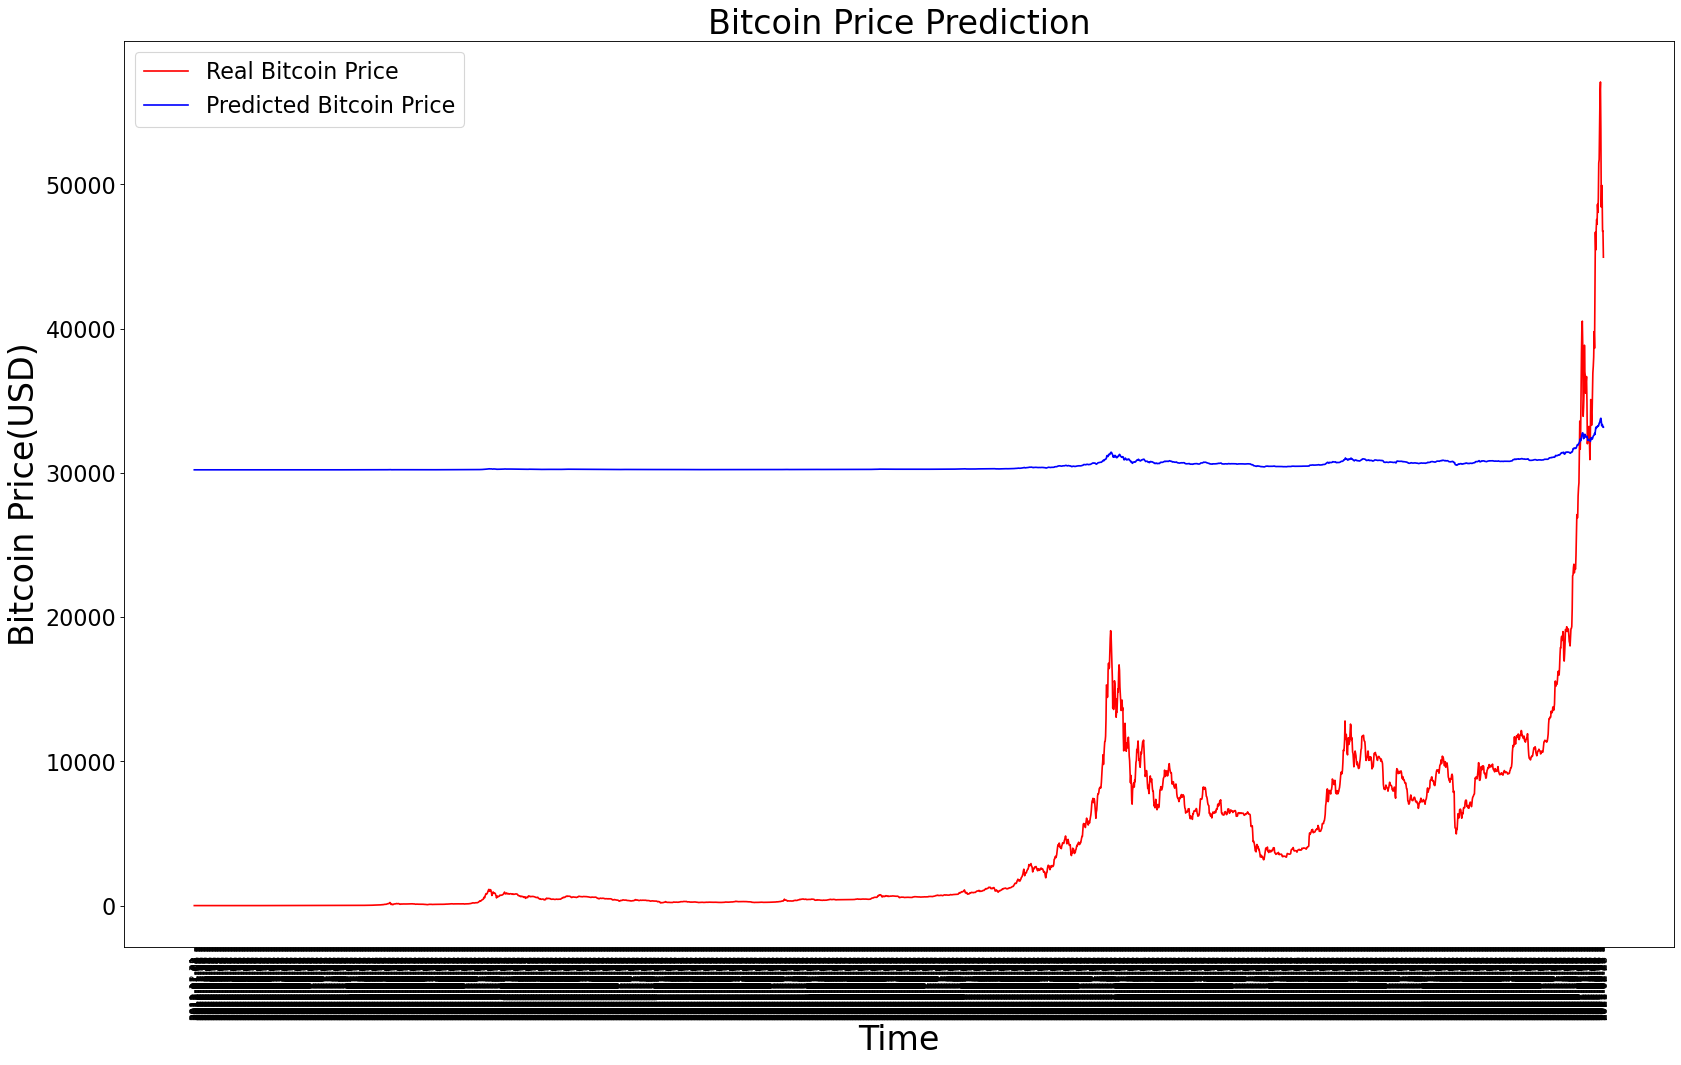

In [61]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='b')
bitcoinn = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real Bitcoin Price')
plt.plot(predictedbitcoinprice, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction', fontsize=30)
bitcoin_test = df_test.reset_index()
x=bitcoin_test.index
label = bitcoin_test['date']
plt.xticks(x, label, rotation = 'vertical')
for tick in bitcoinn.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
for tick in bitcoinn.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Bitcoin Price(USD)', fontsize=30)
plt.legend(loc=2, prop={'size': 20})
plt.show()